# 比较不同的简单阈值处理方法

127.0


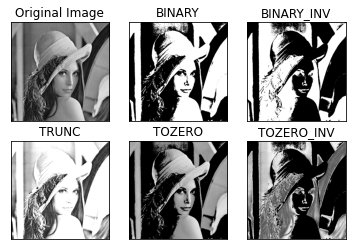

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('D:/Mechine_learning_data/lena512.bmp',0)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
print(ret)
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

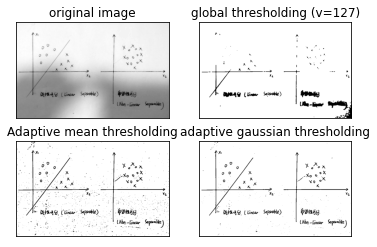

In [25]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
# 变成灰度图
img = cv2.imread('D:/Mechine_learning_data/55.jpg',cv2.IMREAD_GRAYSCALE)
#print(np.array(img).shape)
#中值滤波
img = cv2.medianBlur(img,5)
ret , th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
 # 11为block size，2为C值
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C , cv2.THRESH_BINARY,11,2 )
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C , cv2.THRESH_BINARY,11,2)

titles = ['original image' , 'global thresholding (v=127)','Adaptive mean thresholding',
          'adaptive gaussian thresholding']
images = [img,th1,th2,th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [30]:
import random
def sp_noise(image,prob):
    '''
    添加椒盐噪声
    prob:噪声比例 
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

116.0 117.0


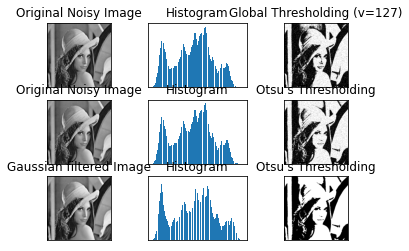

In [31]:
img = cv2.imread('D:/Mechine_learning_data/lena512.bmp',cv2.IMREAD_GRAYSCALE)
src2 = sp_noise(img,0.05)
# 全局阈值
ret1,th1 = cv.threshold(src2,127,255,cv.THRESH_BINARY)
# Otsu阈值
ret2,th2 = cv.threshold(src2,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# 高斯滤波后再采用Otsu阈值
blur = cv.medianBlur(src2,5)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print(ret2,ret3)
# 绘制所有图像及其直方图
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [33]:

blur = cv.medianBlur(src2,5)
# 寻找归一化直方图和对应的累积分布函数
hist = cv.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()
bins = np.arange(256)
fn_min = np.inf
thresh = -1
for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # 概率
    q1,q2 = Q[i],Q[255]-Q[i] # 对类求和
    b1,b2 = np.hsplit(bins,[i]) # 权重
    # 寻找均值和方差
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
    # 计算最小化函数
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i
# 使用OpenCV函数找到otsu的阈值
ret, otsu = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print( "{} {}".format(thresh,ret) )

117 117.0


D:\Anacondaa\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
D:\Anacondaa\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
D:\Anacondaa\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app
